In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=";")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (41188, 21)

First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.

In [13]:
# Basic statistics
print("\nDataset statistics:")
print(df.describe().T)


Dataset statistics:
                  count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000 

In [14]:
# Data types and missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17 

In [15]:
# Check for null values
print("\nNull values check:")
print(df.isnull().sum())


Null values check:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Text(0, 0.5, 'Count')

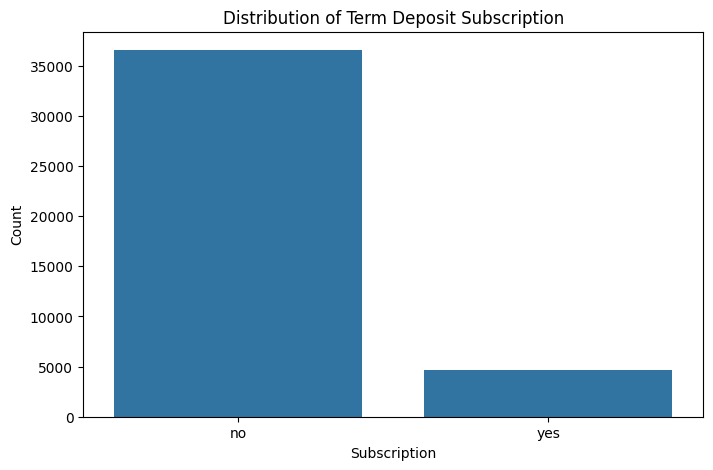

In [16]:
# Visualize target variable distribution with exact counts
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscription')
plt.ylabel('Count')


In [17]:
# Add exact count labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')

plt.show()

In [ ]:
# Calculate and display class distribution
class_dist = df['y'].value_counts()
print("Class Distribution:")
print(class_dist)
print("\nClass Percentage:")
print(class_dist / len(df) * 100)

Class Distribution:
no     36548
yes     4640
Name: y, dtype: int64

Class Percentage:
no     88.734583
yes    11.265417
Name: y, dtype: float64


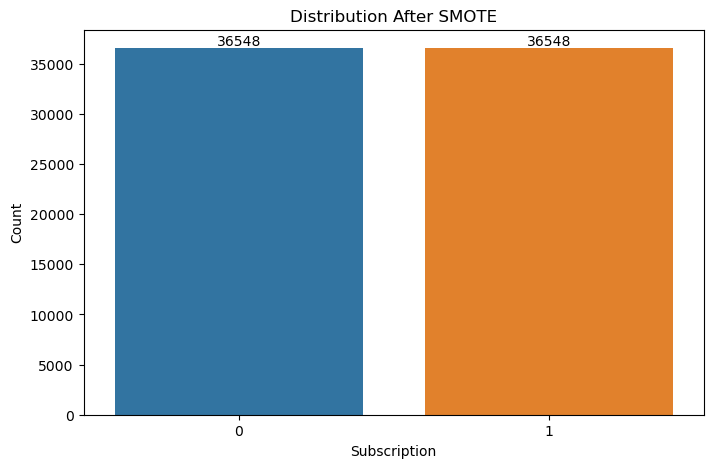

In [ ]:
# Make a copy of the original dataframe to preserve it
df_encoded = df.copy()

# Convert target to binary (0 for 'no', 1 for 'yes')
y = df_encoded['y'].map({'no': 0, 'yes': 1})

# Encode all categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'poutcome']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_encoded.drop('y', axis=1), y)

# Visualize after SMOTE
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y_resampled)
plt.title('Distribution After SMOTE')
plt.xlabel('Subscription')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')

plt.show()

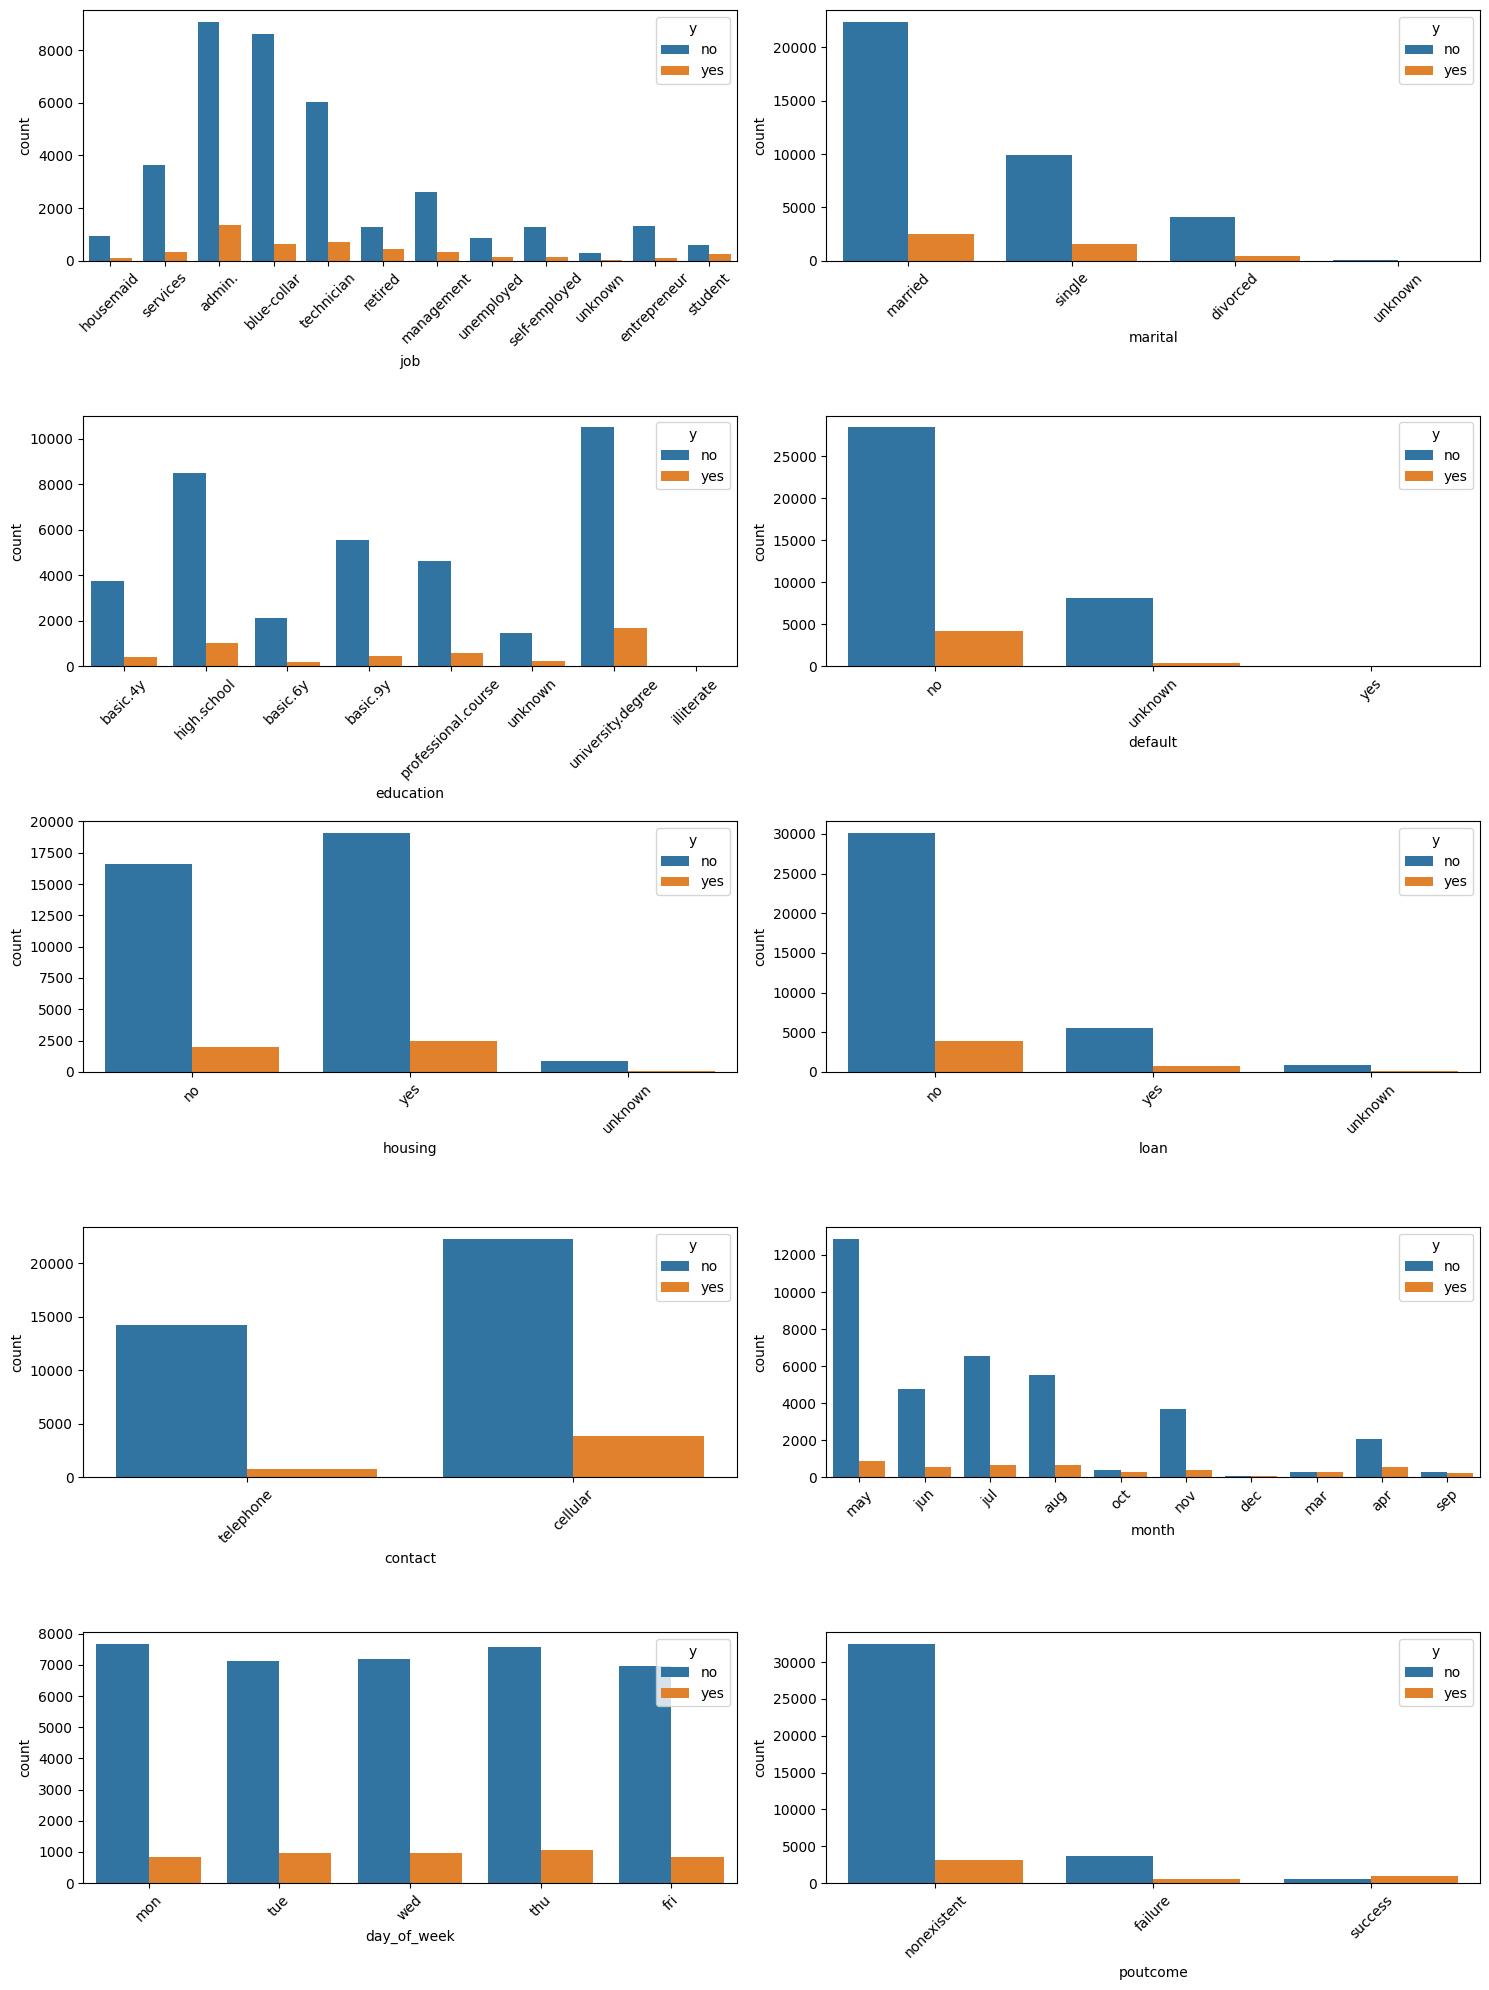

In [18]:
# Visualize categorical features
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, hue='y', data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

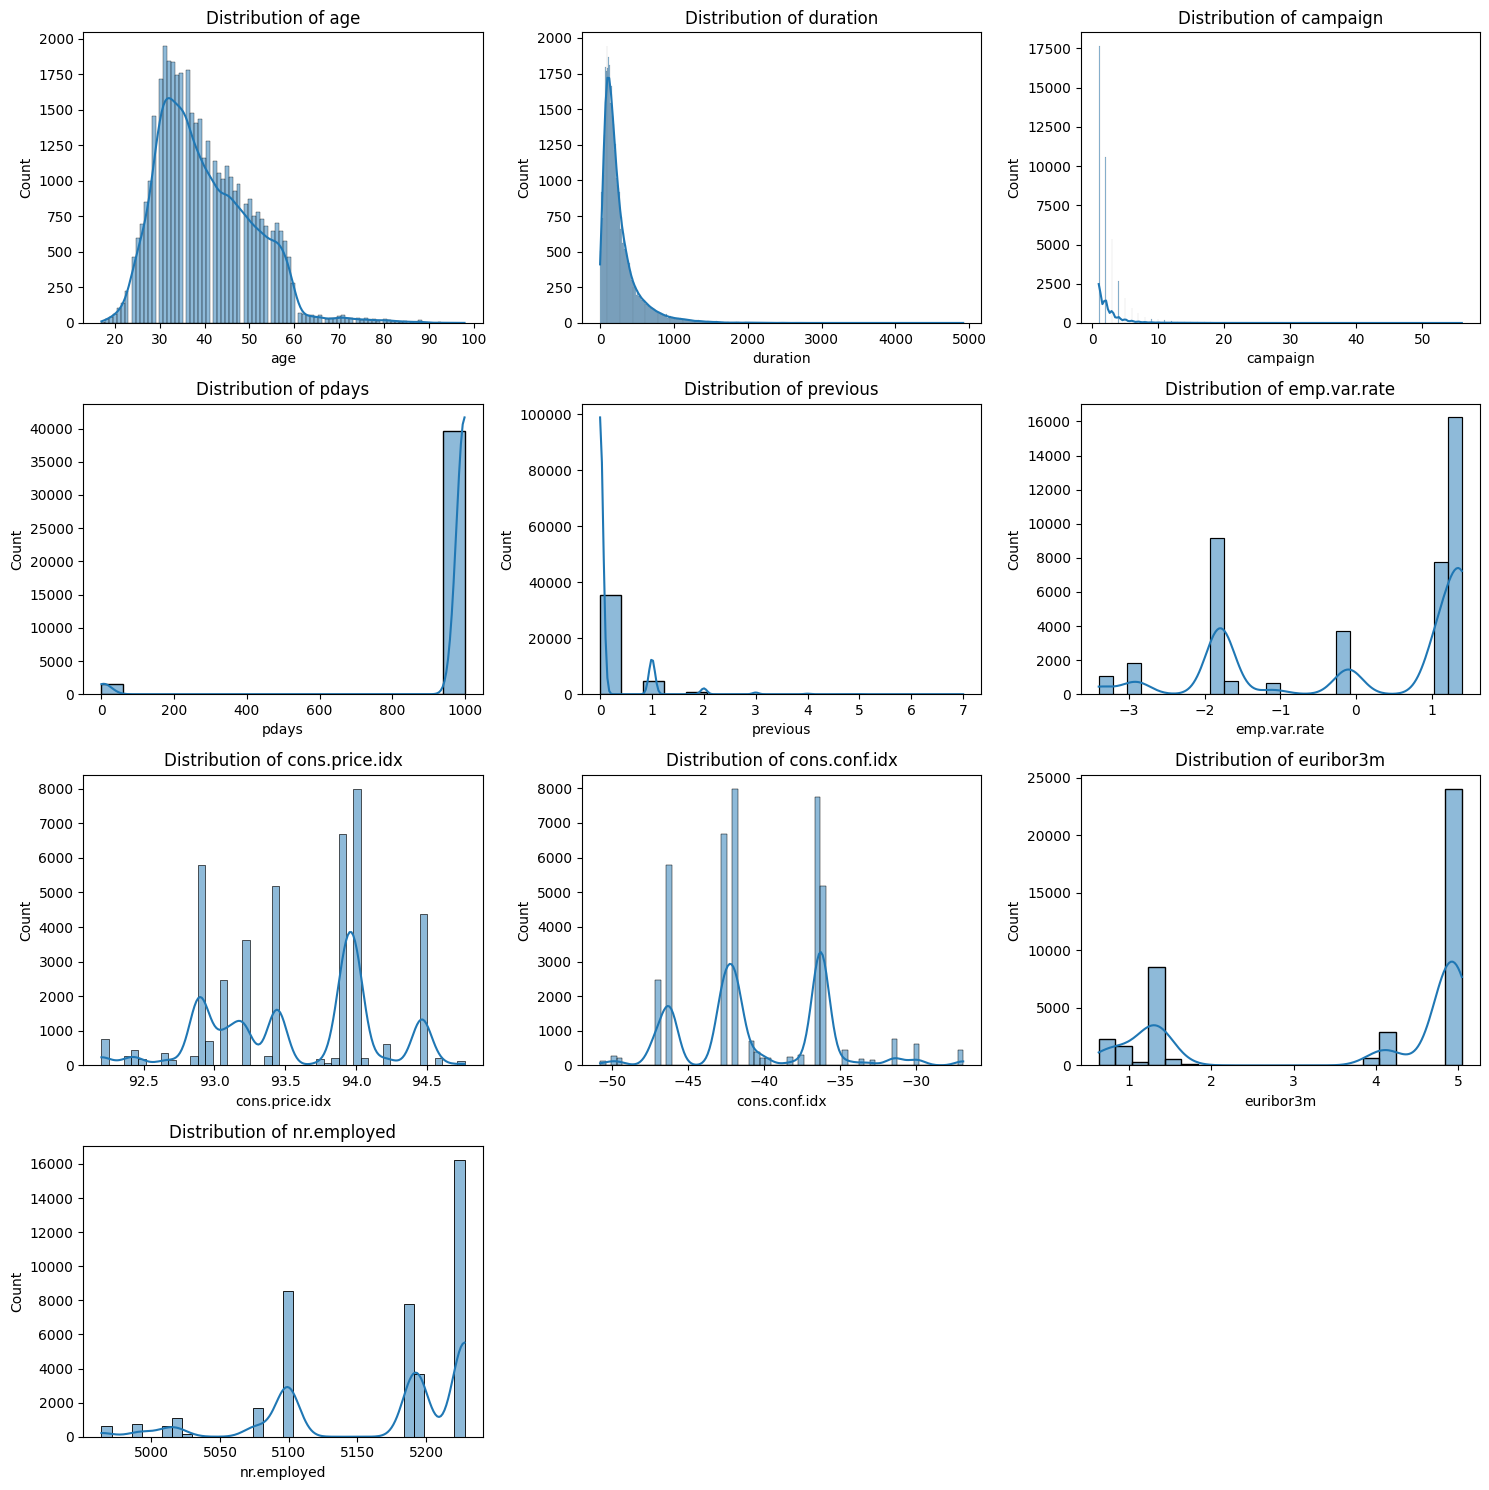

In [19]:
# Visualize numerical features
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

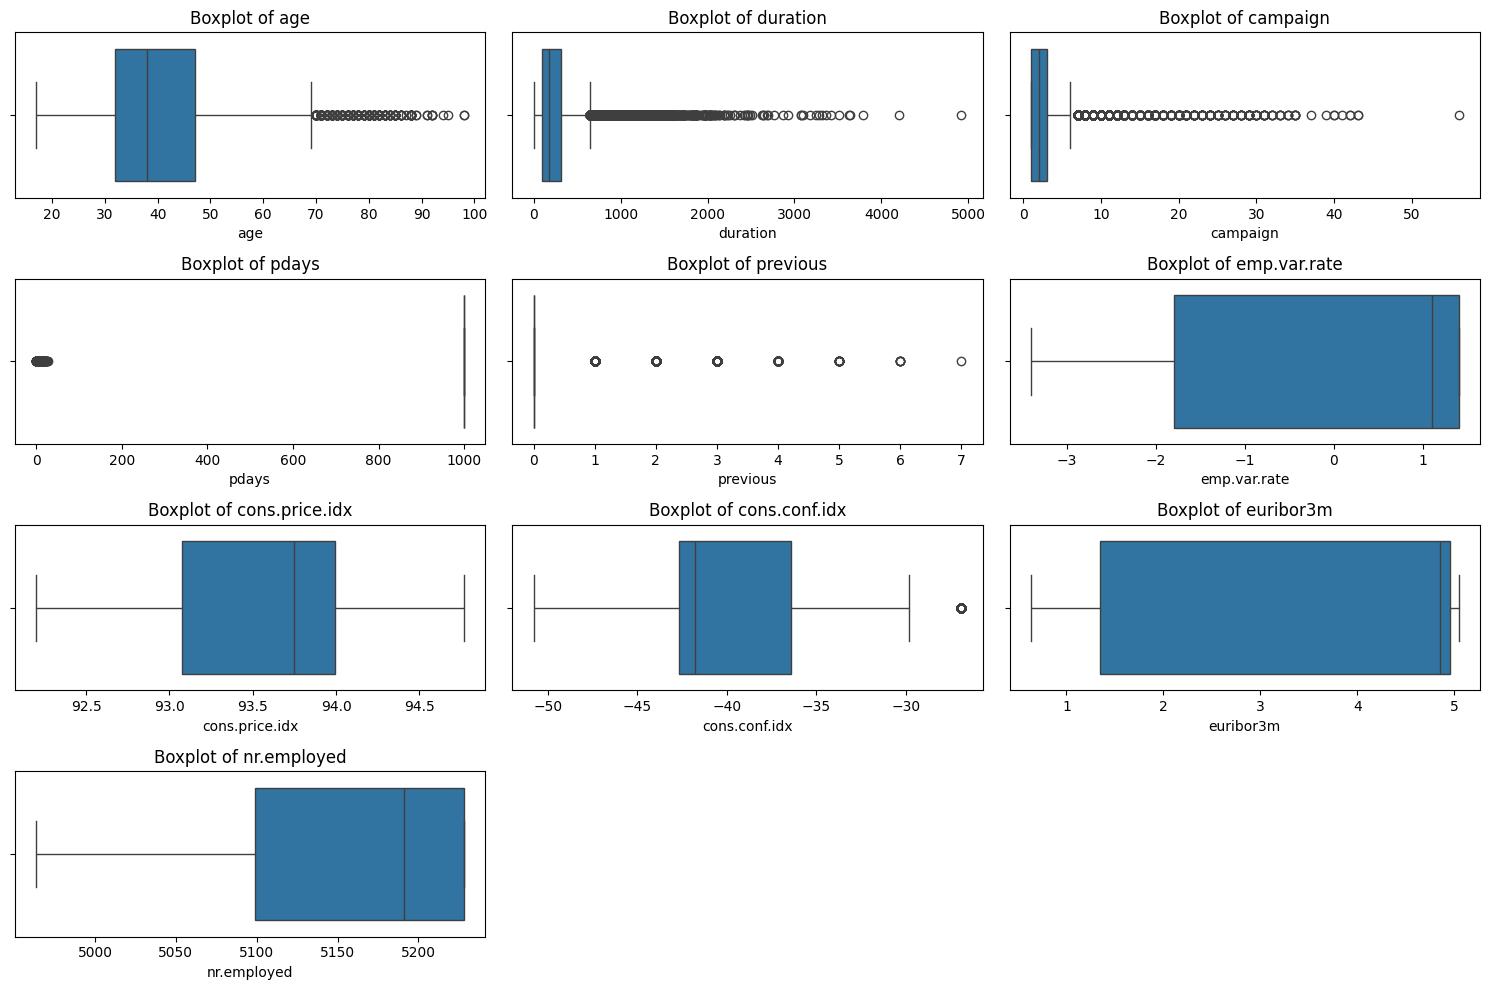

In [20]:
# Boxplots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

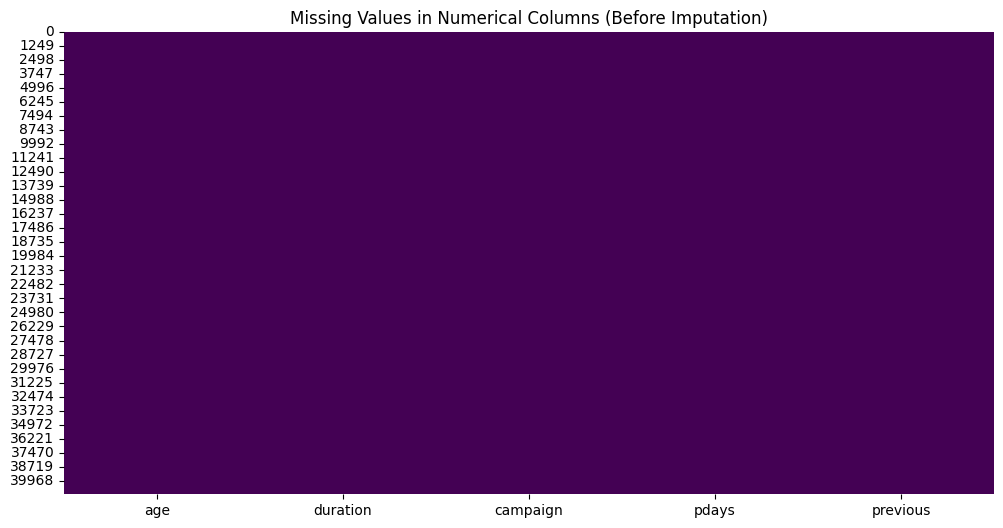

In [21]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Numerical Columns (Before Imputation)')
plt.show()


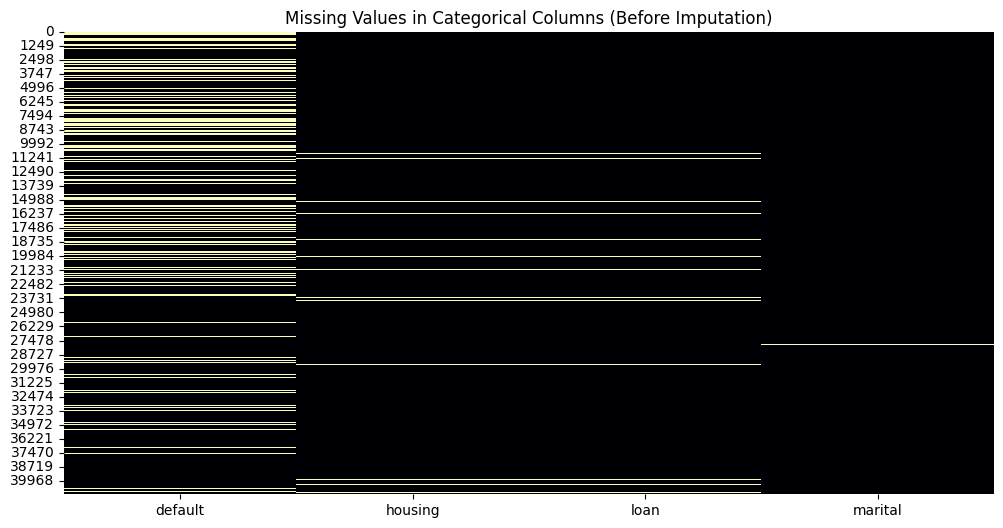

In [22]:
imputer_median = SimpleImputer(strategy='median')
df[num_cols] = imputer_median.fit_transform(df[num_cols])

# Categorical columns: Replace 'unknown' with NaN -> Mode imputation
cat_cols_to_impute = ['default', 'housing', 'loan', 'marital']
df[cat_cols_to_impute] = df[cat_cols_to_impute].replace('unknown', np.nan)

plt.figure(figsize=(12, 6))
sns.heatmap(df[cat_cols_to_impute].isnull(), cbar=False, cmap='magma')
plt.title('Missing Values in Categorical Columns (Before Imputation)')
plt.show()

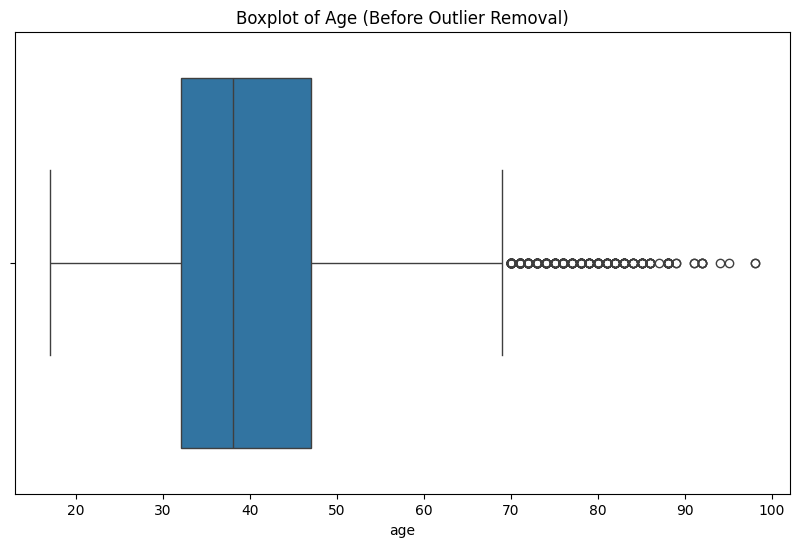

In [23]:
imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols_to_impute] = imputer.fit_transform(df[cat_cols_to_impute])

# --- 2. Outlier Handling for Age ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age (Before Outlier Removal)')
plt.show()

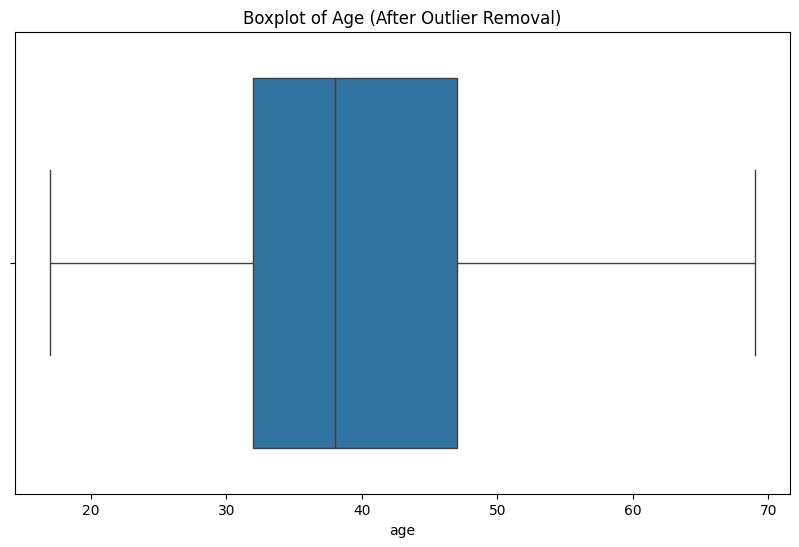

In [24]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df = df[(df['age'] > lower_limit) & (df['age'] < upper_limit)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age (After Outlier Removal)')
plt.show()

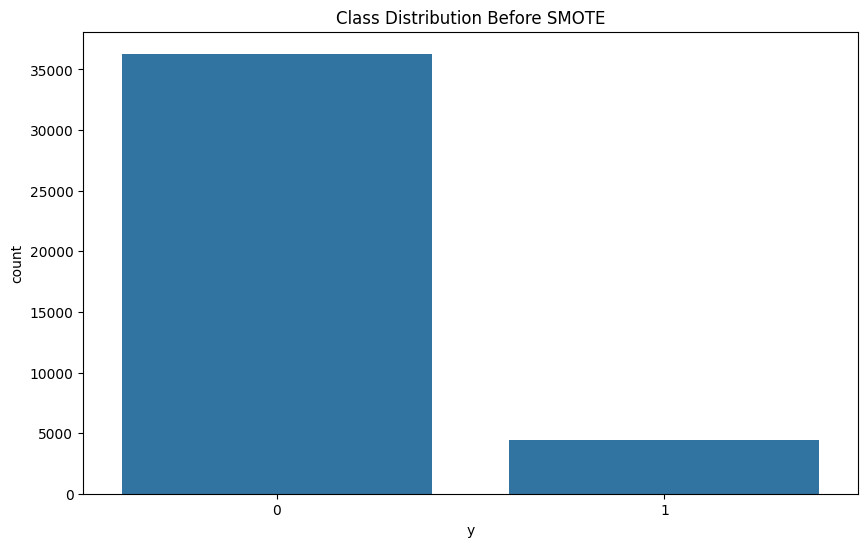

In [25]:
# --- 3. Categorical Encoding ---
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'poutcome']
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

# --- 4. Class Distribution Before/After SMOTE ---
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.show()

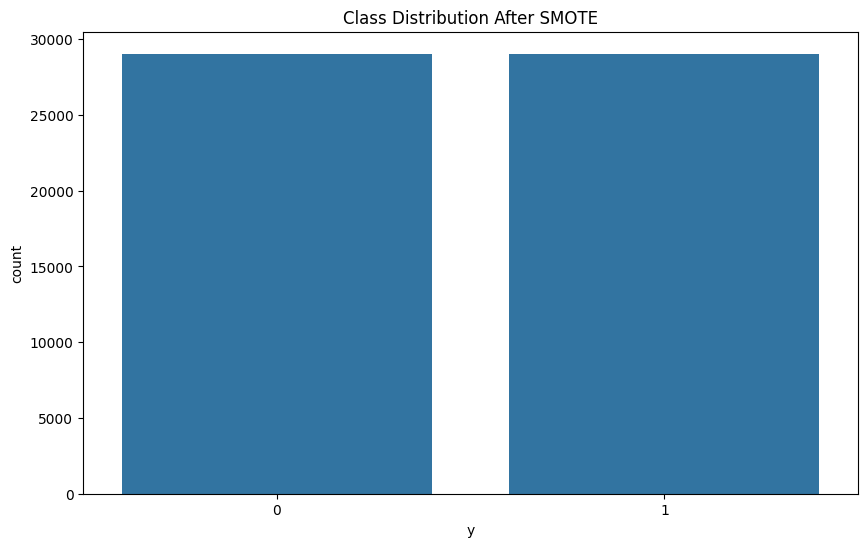

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Data preprocessing complete with visualizations!")

Data preprocessing complete with visualizations!


In [28]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with more iterations
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("\n Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("\n Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Logistic Regression Model Evaluation:
Accuracy: 0.8583
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7254
           1       0.43      0.87      0.57       890

    accuracy                           0.86      8144
   macro avg       0.70      0.86      0.74      8144
weighted avg       0.92      0.86      0.88      8144


 Logistic Regression Confusion Matrix:
 [[6219 1035]
 [ 119  771]]


In [30]:
# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_selected = X_train_scaled
X_test_selected = X_test_scaled

print("\n Selected Features:", X_train.columns)

# Train SVM Model with Optimized Class Weights & C-Tuning
svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced', probability=True)
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict(X_test_selected)

# Evaluate the Model
print("\n SVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))
print("\n SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


 Selected Features: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

 SVM Model Evaluation:
Accuracy: 0.8457
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7254
           1       0.41      0.90      0.56       890

    accuracy                           0.85      8144
   macro avg       0.70      0.87      0.73      8144
weighted avg       0.92      0.85      0.87      8144


 SVM Confusion Matrix:
 [[6085 1169]
 [  88  802]]


In [31]:
# Extract Weights & Bias (Check If Available)
if hasattr(svm_model, "coef_"):
    w = svm_model.coef_
    b = svm_model.intercept_
    print("\n SVM Weights (w):\n", w)
    print("\n SVM Bias (b):\n", b)
else:
    print("\n SVM Model does not have coef attributes. Consider using dual=False or different solver")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully!")

joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(logreg, 'log_reg_model.pkl')
print("\n Models saved successfully!")


 SVM Weights (w):
 [[-1.93450392e-02  3.78113213e-02  4.95515966e-02  1.30920087e-01
  -2.71255240e-13  1.02252083e-02 -1.19582839e-02 -2.11139867e-01
  -3.28658236e-01  3.59313553e-04  1.21870629e+00 -1.48227809e-02
  -8.15042039e-02 -2.81886362e-02  1.17277268e-01 -1.59530389e+00
   1.41760413e-01 -4.88068692e-02  1.97511843e+00 -1.33677449e+00]]

 SVM Bias (b):
 [-0.82584204]
Scaler saved successfully!

 Models saved successfully!


In [37]:
# ************* PREDICTION SECTION WITH MANUAL STRING INPUTS *************
# Load necessary objects
svm_model = joblib.load("svm_model.pkl")
scaler = joblib.load("scaler.pkl")

# Create mapping dictionaries for categorical features from the original encoders
# (We'll reconstruct these since we didn't save them earlier)
categorical_mappings = {
    'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
            'retired', 'self-employed', 'services', 'student', 'technician',
            'unemployed', 'unknown'],
    'marital': ['divorced', 'married', 'single', 'unknown'],
    'education': ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
                 'professional.course', 'university.degree', 'unknown'],
    'default': ['no', 'yes', 'unknown'],
    'housing': ['no', 'yes', 'unknown'],
    'loan': ['no', 'yes', 'unknown'],
    'contact': ['cellular', 'telephone'],
    'month': ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'],
    'poutcome': ['failure', 'nonexistent', 'success']
}

# Function to encode categorical values
def encode_value(feature, value):
    if feature in categorical_mappings:
        try:
            return categorical_mappings[feature].index(value.lower())
        except ValueError:
            # Return most common category if value not found
            return 0
    return value

# Manual input with string values
input_data = {
    'age': [30],
    'job': ['blue-collar'],
    'marital': ['married'],
    'education': ['high.school'],
    'default': ['no'],
    'housing': ['yes'],
    'loan': ['no'],
    'duration': [1500],
    'campaign': [1],
    'pdays': [999],
    'previous': [0],
    'poutcome': ['nonexistent'],
    'emp.var.rate': [1.4],
    'cons.price.idx': [93.918],
    'cons.conf.idx': [-42.7],
    'euribor3m': [4.961],
    'nr.employed': [5228.1],
    'contact': ['telephone'],
    'month': ['may'],
    'day_of_week': ['mon']
}

# Encode the categorical values
encoded_data = {}
for key, value in input_data.items():
    if isinstance(value[0], str):
        encoded_data[key] = [encode_value(key, value[0])]
    else:
        encoded_data[key] = value

# Create DataFrame and ensure correct feature order
df_input = pd.DataFrame(encoded_data)
df_input = df_input[X_train.columns]  # Use same column order as training

# Scale the input
df_input_scaled = scaler.transform(df_input)

# Make prediction
prediction = svm_model.predict(df_input_scaled)
predicted_subscription = 'yes' if prediction[0] == 1 else 'no'

print(f"\nPredicted Subscription: {predicted_subscription}")


Predicted Subscription: yes


In [39]:
import joblib

# Export model and scaler
joblib.dump(svm_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [41]:
from google.colab import files
files.download('model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>